<a href="https://colab.research.google.com/github/ShashankBDSC/playstoreEDA/blob/main/playstoreEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Playstore data analysis**

**Project Type - Exploratory Data Analysis (EDA)**

**Contribution - Individual**

**Team Member 1 - SHASHANK BAJPAI**

#**Github Link ::**

https://github.com/ShashankBDSC

# ***Let's Begin !***

## ***1. Knowing The Data***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/Play Store Data.csv')
df.shape

(10841, 13)

## ***2. Understanding The Variables***

In [3]:
list(df.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

1. **App** : Name of the app
2. **Category** : The category to  which the app belongs
3. **Rating** : Rating received by an app out of 5
4. **Reviews** : No. Of reviews received by app
5. **Size** : The of size app in Megabytes(M) and Kilobytes(k)
6.**Installs** : No of installs the app has received
7.**Type** : Whether the app is free or paid
8.**Content Rating** : Content served by the app
9.   **Genres** : Genre of the app         
10. **Last Updated** : date when the app was last updated    
11.  **Current Ver** : Current Version of the app
12.  **Android Ver** : Android Version supported by the app

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. ***Data Wrangling*** ***and Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Checking for dupicate rows and removing them

In [5]:
df.duplicated().sum()

483

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

####Dealing with NaN values:

In [8]:
df.isnull().sum()


,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [9]:
df['Rating'].isnull().sum()/df.shape[0]*100

14.143657076655725

***Here we can see 14% data is missing from Rating column***

In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#####Checking for **unique values** in each column:

In [11]:
for i in df:
  print(i)
  print(df[i].unique(),df[i].nunique())

App
['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] 9660
Category
['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 34
Rating
[ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ] 40
Reviews
['159' '967' '87510' ... '603' '1195' '3983

So we can seee that **Rating column** has some **wrong entries** as values are **greater than 5**

In [12]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [13]:
df.drop(10472,inplace=True)

#####Converting the data type of various columns for further analysis

In [14]:
df.Installs=df.Installs.str.replace('+','')
df.Installs=df.Installs.str.replace(',','')

In [15]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [16]:
df[['Reviews','Installs']]=df[['Reviews','Installs']].astype(int)

In [17]:
df.Price=df.Price.str.replace('$','')

In [18]:
df.Type=df.Type.str.replace('0','Free')

In [19]:
df['Price'].unique()

array(['0', '4.99 ', '3.99 ', '6.99 ', '1.49 ', '2.99 ', '7.99 ', '5.99 ',
       '3.49 ', '1.99 ', '9.99 ', '7.49 ', '0.99 ', '9.00 ', '5.49 ',
       '10.00 ', '24.99 ', '11.99 ', '79.99 ', '16.99 ', '14.99 ',
       '1.00 ', '29.99 ', '12.99 ', '2.49 ', '10.99 ', '1.50 ', '19.99 ',
       '15.99 ', '33.99 ', '74.99 ', '39.99 ', '3.95 ', '4.49 ', '1.70 ',
       '8.99 ', '2.00 ', '3.88 ', '25.99 ', '399.99 ', '17.99 ',
       '400.00 ', '3.02 ', '1.76 ', '4.84 ', '4.77 ', '1.61 ', '2.50 ',
       '1.59 ', '6.49 ', '1.29 ', '5.00 ', '13.99 ', '299.99 ', '379.99 ',
       '37.99 ', '18.99 ', '389.99 ', '19.90 ', '8.49 ', '1.75 ',
       '14.00 ', '4.85 ', '46.99 ', '109.99 ', '154.99 ', '3.08 ',
       '2.59 ', '4.80 ', '1.96 ', '19.40 ', '3.90 ', '4.59 ', '15.46 ',
       '3.04 ', '4.29 ', '2.60 ', '3.28 ', '4.60 ', '28.99 ', '2.95 ',
       '2.90 ', '1.97 ', '200.00 ', '89.99 ', '2.56 ', '30.99 ', '3.61 ',
       '394.99 ', '1.26 ', '1.20 ', '1.04 '], dtype=object)

In [20]:
df[df['Rating'].isnull()].sort_values(by='Reviews',ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3589,We learn children's verses in kindergarten,PARENTING,NaN,3248,6.5M,100000,Free,0,Everyone,Parenting;Education,20-Dec-17,2.1,4.0 and up
9567,Adivina el Emoji,GAME,NaN,2536,32M,100000,Free,0,Everyone,Trivia,2-Oct-16,1,4.0.3 and up
1559,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2.4M,500000,Free,0,Everyone,Libraries & Demo,8-Jan-17,1.1,2.3 and up
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,NaN,1330,22M,50000,Free,0,Everyone,Comics,3-Jul-18,6.1.1,4.2 and up
9612,Em Fuga Brasil,FAMILY,NaN,1317,60M,100000,Free,0,Everyone,Simulation,22-Apr-18,1,4.1 and up
3621,Voice Tables - no internet,PARENTING,NaN,970,71M,100000,Free,0,Everyone,Parenting,28-May-18,2,4.0.3 and up
704,Ai La Trieu Phu - ALTP Free,EDUCATION,NaN,776,24M,100000,Free,0,Everyone,Education,23-Jul-18,1.5,4.0 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,100000,Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
5840,Holy Quran Mehmet Emin Ay,LIFESTYLE,NaN,649,55M,10000,Free,0,Everyone,Lifestyle,14-Mar-17,1.3.1,4.0.3 and up
1520,Luffs,LIBRARIES_AND_DEMO,NaN,487,3.7M,100000,Free,0,Everyone,Libraries & Demo,16-Jan-18,1,4.0.3 and up


In [21]:
df[df['Rating'].isnull()]['Installs'].value_counts()

,count
Installs,
100,407
10,316
1000,192
50,148
500,129
5,73
1,64
10000,44
5000,43


In [22]:
df.dropna(inplace=True,ignore_index=True)

In [23]:
df.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [24]:
df[['Price','Rating']]=df[['Price','Rating']].astype('float')

In [25]:
df['Last Updated']=pd.to_datetime(df['Last Updated'],format='%d-%b-%y')

In [26]:
df.rename(columns={'Installs':'Installs_In_Million','Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'},inplace=True)

In [27]:
i=df['App'].value_counts().reset_index()
i

,App,count
0,ROBLOX,9
1,8 Ball Pool,7
2,Bubble Shooter,6
3,Helix Jump,6
4,Zombie Catchers,6
...,...,...
8185,Block City Wars + skins export,1
8186,KineMaster – Pro Video Editor,1
8187,Koi Live Wallpaper,1
8188,Geometry Dash Meltdown,1


So we can see here that the correct data should have only **8190 rows** but beacuse of errors during data entry the rows have increased to **8886**

In [28]:
i[i['count']>1]

,App,count
0,ROBLOX,9
1,8 Ball Pool,7
2,Bubble Shooter,6
3,Helix Jump,6
4,Zombie Catchers,6
...,...,...
516,Final Fantasy XV: A New Empire,2
517,"Phogy, 3D Camera",2
518,Puffin Web Browser,2
519,Candy Crush Jelly Saga,2


In [29]:
app1=df[df['App']=='ROBLOX'].sort_values(by='Reviews',ascending=[False])
app1

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1873,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1775,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1571,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1704,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1543,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1456,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1364,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1412,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
3891,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [30]:
app2=df[df['App']=='Duolingo: Learn Languages Free'].sort_values(by='Reviews',ascending=False)
app2

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
7007,Duolingo: Learn Languages Free,FAMILY,4.7,6297590,Varies with device,100000000,Free,0.0,Everyone,Education;Education,2018-08-06,Varies with device,Varies with device
1744,Duolingo: Learn Languages Free,FAMILY,4.7,6294400,Varies with device,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
1882,Duolingo: Learn Languages Free,FAMILY,4.7,6294397,Varies with device,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
643,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507,Varies with device,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device
565,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924,Varies with device,100000000,Free,0.0,Everyone,Education;Education,2018-08-01,Varies with device,Varies with device


In [31]:
df[df['App']=='Bubble Shooter'].sort_values(by='Reviews',ascending=False)

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1664,Bubble Shooter,GAME,4.5,148990,46M,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1576,Bubble Shooter,GAME,4.5,148945,46M,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1368,Bubble Shooter,GAME,4.5,148897,46M,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1421,Bubble Shooter,GAME,4.5,148895,46M,10000000,Free,0.0,Everyone,Casual,2018-07-17,1.20.1,4.0.3 and up
1729,Bubble Shooter,FAMILY,4.4,59843,20M,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-01-09,2.3.3122,2.3 and up
3302,Bubble Shooter,GAME,4.5,43576,50M,5000000,Free,0.0,Everyone,Arcade,2017-09-13,4.4,2.3 and up


In [32]:
df[df['App']=='English Grammar Test']

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
572,English Grammar Test,EDUCATION,4.8,4075,5.1M,500000,Free,0.0,Everyone,Education,2018-06-22,2.1.8,4.0.3 and up
5396,English Grammar Test,FAMILY,4.6,104676,2.6M,5000000,Free,0.0,Everyone,Education,2018-07-18,1.9.7,4.0 and up


In [33]:
df[df['App']=='Video Editor']

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1897,Video Editor,FAMILY,4.1,159619,23M,5000000,Free,0.0,Everyone,Video Players & Editors;Creativity,2018-07-17,6.14.091,4.3 and up
3139,Video Editor,VIDEO_PLAYERS,4.1,159622,23M,5000000,Free,0.0,Everyone,Video Players & Editors;Creativity,2018-07-17,6.14.091,4.3 and up
4976,Video Editor,VIDEO_PLAYERS,3.8,1156,23M,100000,Free,0.0,Everyone,Video Players & Editors,2015-10-20,1.3.9b,4.3 and up


In [34]:
c=df.groupby('App')

In [35]:
c['Category'].value_counts().reset_index()[c['Category'].value_counts().reset_index()['App']=='ROBLOX']

,App,Category,count
6174,ROBLOX,GAME,5
6175,ROBLOX,FAMILY,4


In [36]:
f=c['Category'].value_counts().reset_index()['App'].value_counts().reset_index()
f[f['count']>1]

,App,count
0,Idle Heroes,2
1,DC Super Hero Girls™,2
2,Video Editor,2
3,Duolingo: Learn Languages Free,2
4,English Grammar Test,2
...,...,...
79,Block Craft 3D: Building Simulator Games For Free,2
80,Plants vs. Zombies FREE,2
81,Ruler,2
82,HBO NOW: Stream TV & Movies,2


Here we can see that in our data there are **some apps** whose data is present more than once just because of the change in **reviews** and also because of presence of **84 apps** in more than **1 category.**

In [37]:
list(df[df['App']=='Solitaire'].sort_values(by='Reviews',ascending=False).iloc[1:,:].index)

[1665, 1712]

In [38]:
la=list(i['App'])

In [39]:
len(la)

8190

In [40]:
t=[]
for  i in la:
  t.extend(list(df[df['App']==i].sort_values(by='Reviews',ascending=False).iloc[1:,:].index))

In [41]:
df3=df.drop(index=t)

In [42]:
df3

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8882,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8883,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up
8884,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [43]:
df3['App'].value_counts()

,count
App,
Photo Editor & Candy Camera & Grid & ScrapBook,1
usgang.ch,1
C I Patel School,1
CI Dictionary,1
Thistletown CI,1
...,...
News Republic,1
HuffPost - News,1
AP Mobile - Breaking News,1


In [44]:
df=df3.copy()

In [45]:
df['Installs_In_Million']/=1000000

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8190 entries, 0 to 8885
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   App                  8190 non-null   object        
 1   Category             8190 non-null   object        
 2   Rating               8190 non-null   float64       
 3   Reviews              8190 non-null   int64         
 4   Size                 8190 non-null   object        
 5   Installs_In_Million  8190 non-null   float64       
 6   Type                 8190 non-null   object        
 7   Price                8190 non-null   float64       
 8   Content_Rating       8190 non-null   object        
 9   Genres               8190 non-null   object        
 10  Last_Updated         8190 non-null   datetime64[ns]
 11  Current_Ver          8190 non-null   object        
 12  Android_Ver          8190 non-null   object        
dtypes: datetime64[ns](1), float64(3), int6

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,0.01,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5.00,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50.00,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,0.10,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,0.05,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3 and up


In [48]:
df.describe(exclude=['datetime','object'])

,Rating,Reviews,Installs_In_Million,Price
count,8190.000000,8.190000e+03,8190.000000,8190.000000
mean,4.173346,2.556849e+05,9.195983,1.035902
std,0.536319,1.986425e+06,58.283576,16.863402
min,1.000000,1.000000e+00,0.000001,0.000000
25%,4.000000,1.270000e+02,0.010000,0.000000
50%,4.300000,3.020000e+03,0.100000,0.000000
75%,4.500000,4.405325e+04,1.000000,0.000000
max,5.000000,7.815831e+07,1000.000000,400.000000


###Exploratory Data Analysis (EDA):

###Univariate Analysis:

In [49]:
numerical_df=df.select_dtypes(exclude=['object','datetime'])

In [50]:
numerical_df

,Rating,Reviews,Installs_In_Million,Price
0,4.1,159,0.0100,0.0
2,4.7,87510,5.0000,0.0
3,4.5,215644,50.0000,0.0
4,4.3,967,0.1000,0.0
5,4.4,167,0.0500,0.0
...,...,...,...,...
8881,4.0,7,0.0005,0.0
8882,4.5,38,0.0050,0.0
8883,5.0,4,0.0001,0.0
8884,4.5,114,0.0010,0.0


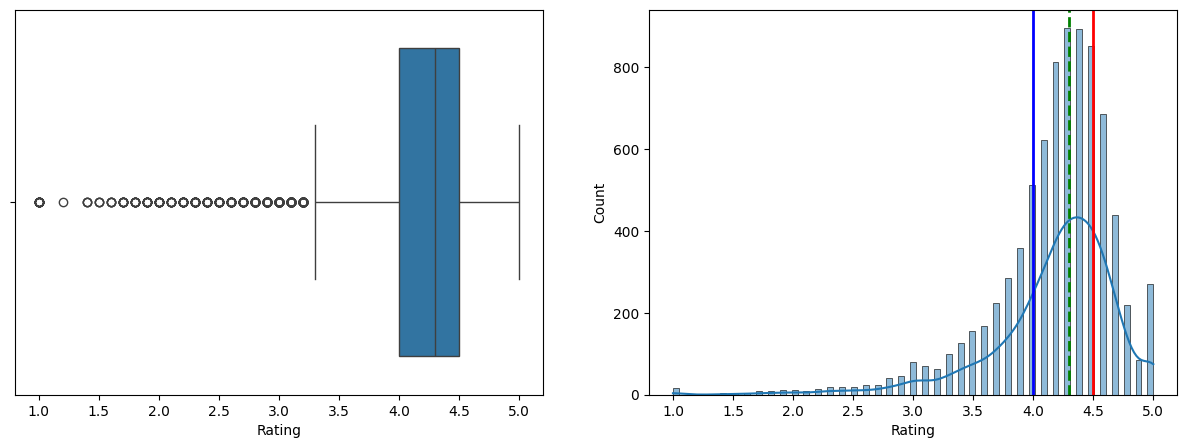

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
quartiles = np.percentile(df['Rating'], [25, 50, 75])
sns.boxplot(numerical_df,x='Rating')


plt.subplot(1,2,2)
sns.histplot(numerical_df,x='Rating',kde=True)
plt.axvline(quartiles[0], color='blue', linestyle='-', linewidth=2, label='25th percentile')
plt.axvline(quartiles[1], color='green', linestyle='--', linewidth=2, label='50th percentile (median)')
plt.axvline(quartiles[2], color='red', linestyle='-', linewidth=2, label='75th percentile')
plt.show()

from the above graph we can visualise that 50 % of the have ratings between **4 and 4.5** and few apps have received ratings **less than 3**

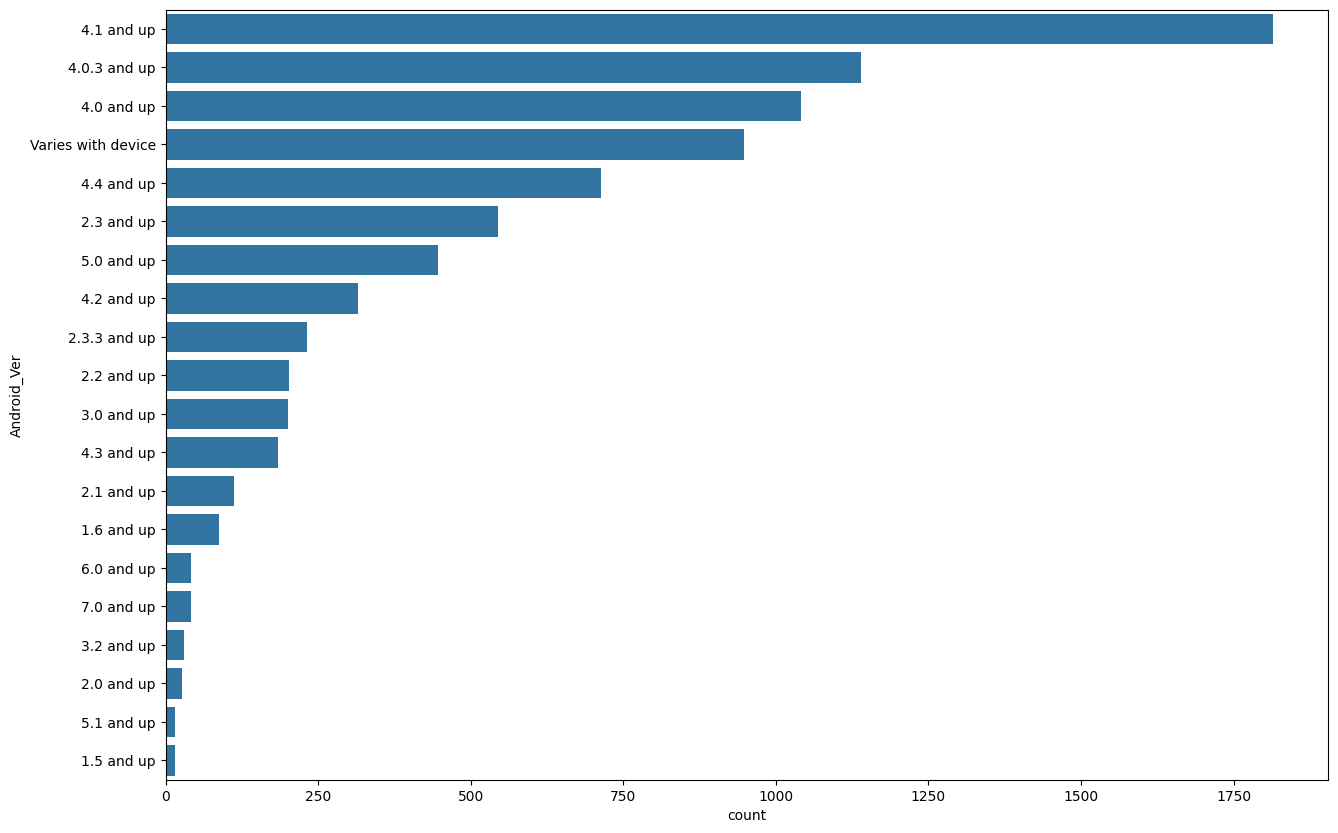

In [52]:
plt.figure(figsize=(15,10))
t=df['Android_Ver'].value_counts().reset_index().head(20)
sns.barplot(data=t,y='Android_Ver',x='count')
plt.show()

Here we can see that android version most supported by apps are **4.1 , 4.0.3 , 4.0 are 4.4**

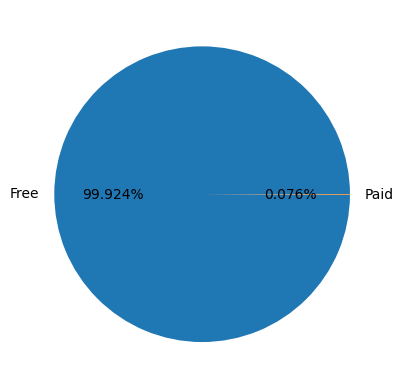

In [53]:
cat3df=df.groupby('Type')[['Installs_In_Million']].sum().sort_values(by=['Installs_In_Million'],ascending=False).reset_index().head(10)
plt.pie(x=cat3df['Installs_In_Million'],labels=cat3df['Type'],autopct='%1.03f%%')
plt.show()

The pie chart depicts that mostly all of the apps are free

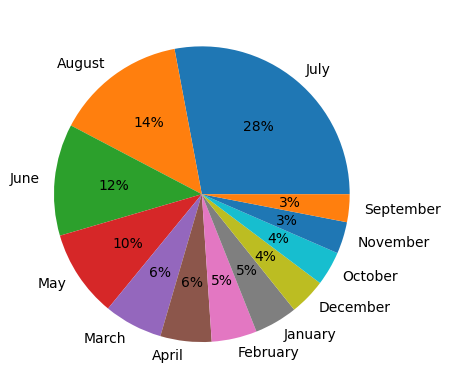

In [54]:
df['Updated_year']=df['Last_Updated'].dt.year
df['Updated_month']=df['Last_Updated'].dt.month_name()
d=df['Updated_month'].value_counts().reset_index()
plt.pie(x=d['count'],labels=d['Updated_month'],autopct='%1.0f%%')
plt.show()

The pie chart states that most of the apps are updated in **July** followed by **August** and **June**

In [55]:
df.sort_values(by='Price',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Updated_year,Updated_month
3747,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,0.010,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018,May
4616,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,0.001,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,2018,June
4601,I am Rich!,FINANCE,3.8,93,22M,0.001,Paid,399.99,Everyone,Finance,2017-12-11,1,4.1 and up,2017,December
4605,I Am Rich Pro,FAMILY,4.4,201,2.7M,0.005,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017,May
3742,💎 I'm rich,LIFESTYLE,3.8,718,26M,0.010,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018,March
4594,I am rich,LIFESTYLE,3.8,3547,1.8M,0.100,Paid,399.99,Everyone,Lifestyle,2018-01-12,2,4.0.3 and up,2018,January
4602,I am rich(premium),FINANCE,3.5,472,965k,0.005,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,2017,May
4597,I am Rich Plus,FAMILY,4.0,856,8.7M,0.010,Paid,399.99,Everyone,Entertainment,2018-05-19,3,4.4 and up,2018,May
4612,I am Rich,FINANCE,4.3,180,3.8M,0.005,Paid,399.99,Everyone,Finance,2018-03-22,1,4.2 and up,2018,March
4607,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,0.001,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017,December


###**Bivariate Analysis:**

####**What is the trend in installs of apps with year?**

In [56]:
len(list(df['Category'].unique()))

33

In [57]:
e=df.groupby(['Category','Updated_year'])['Installs_In_Million'].sum()
e1=e.loc[['ART_AND_DESIGN','AUTO_AND_VEHICLES','BEAUTY','BOOKS_AND_REFERENCE','BUSINESS','COMICS','COMMUNICATION','DATING']].reset_index()
e2=e.loc[['EDUCATION','ENTERTAINMENT','EVENTS','FINANCE','FOOD_AND_DRINK','HEALTH_AND_FITNESS','HOUSE_AND_HOME','LIBRARIES_AND_DEMO']].reset_index()
e3=e.loc[['LIFESTYLE','GAME','FAMILY','MEDICAL','SOCIAL','SHOPPING','PHOTOGRAPHY','SPORTS']].reset_index()
e4=e.loc[['TRAVEL_AND_LOCAL','TOOLS','PERSONALIZATION','PRODUCTIVITY','PARENTING','WEATHER','VIDEO_PLAYERS','NEWS_AND_MAGAZINES','MAPS_AND_NAVIGATION']].reset_index()

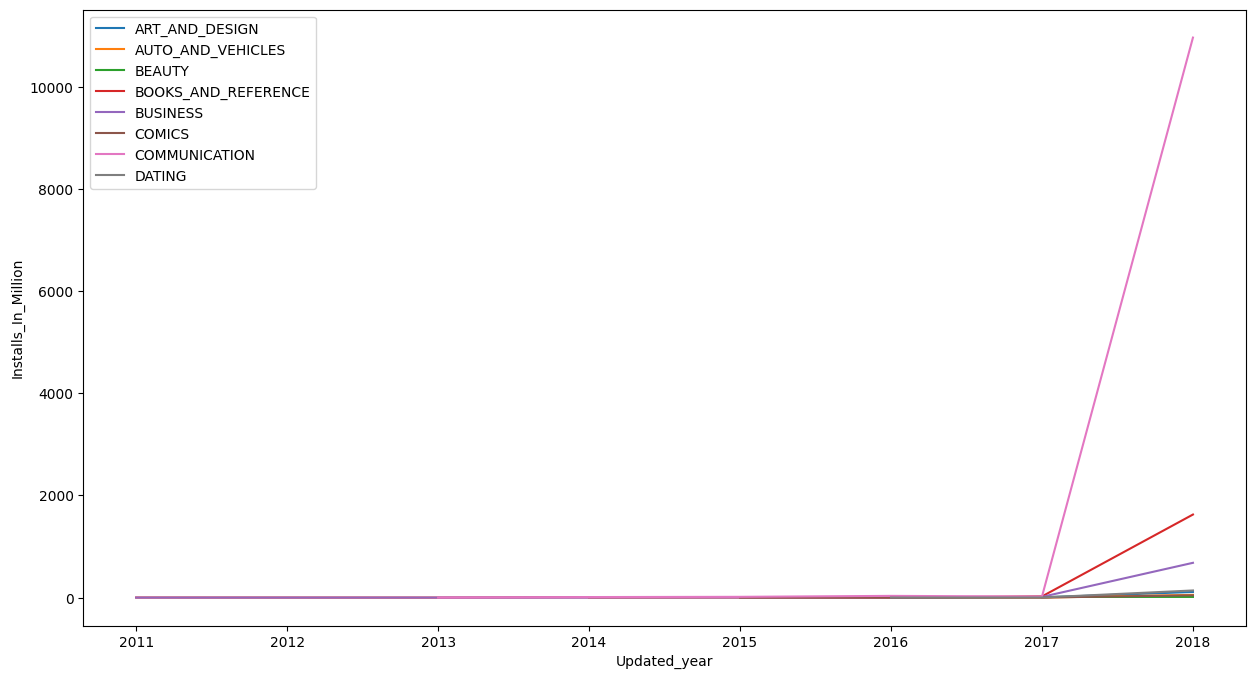

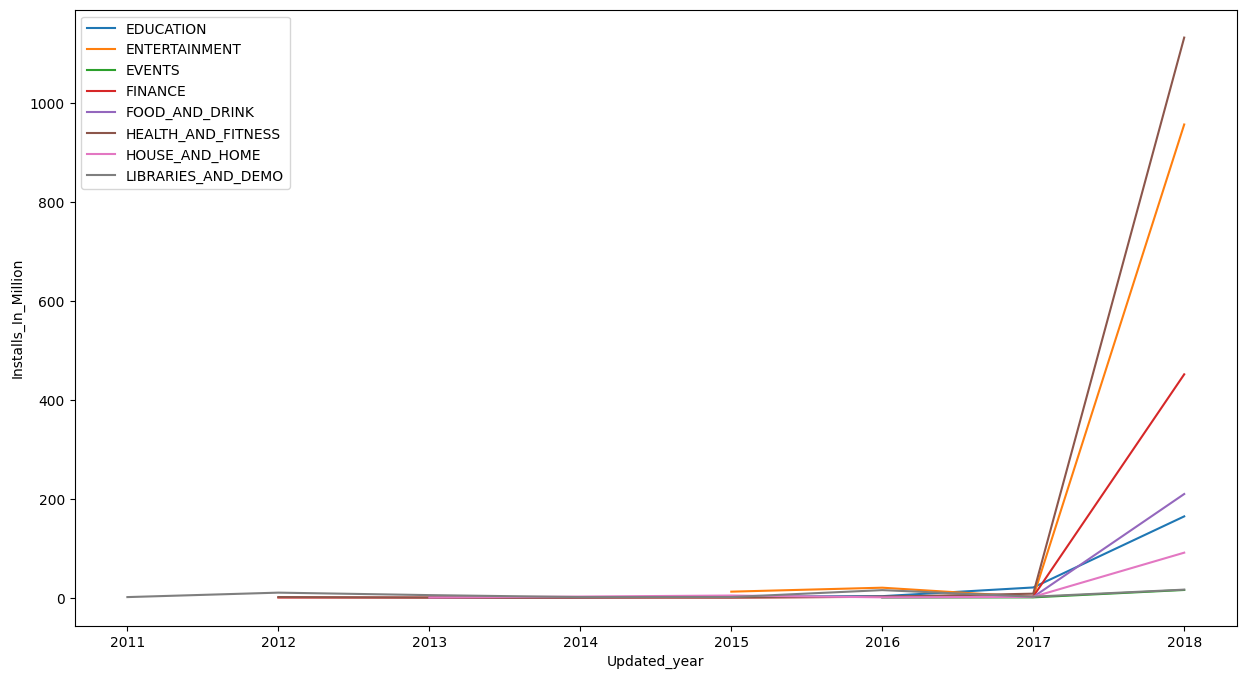

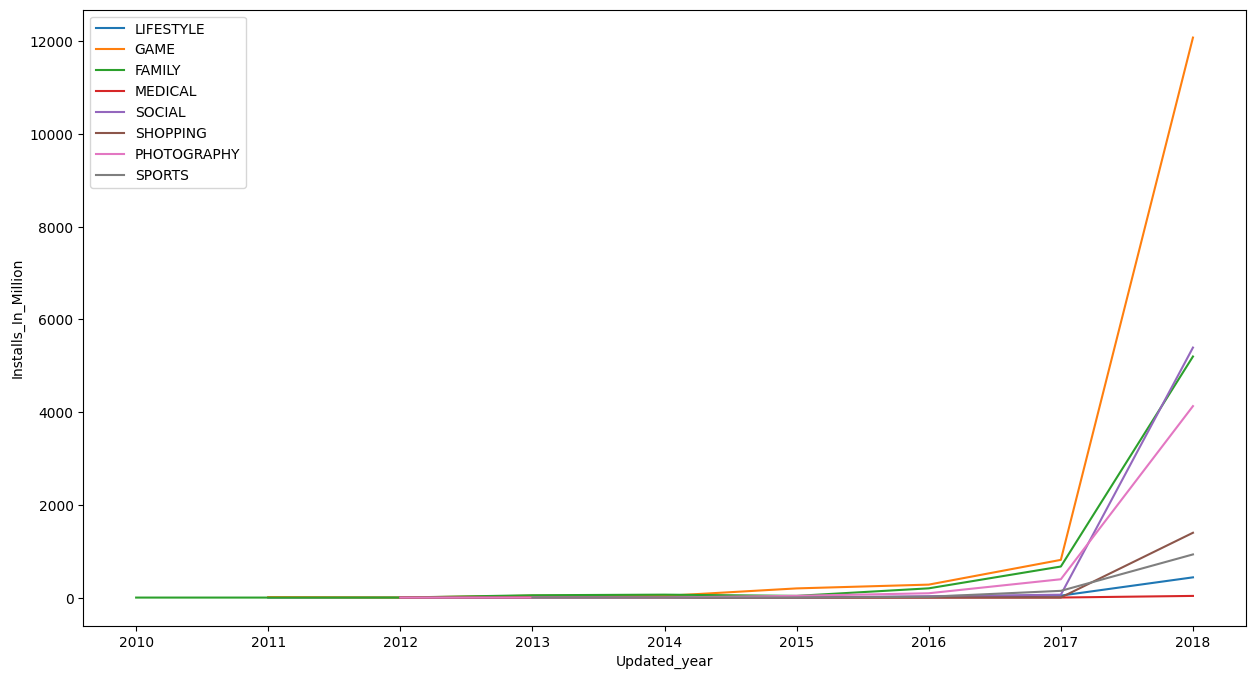

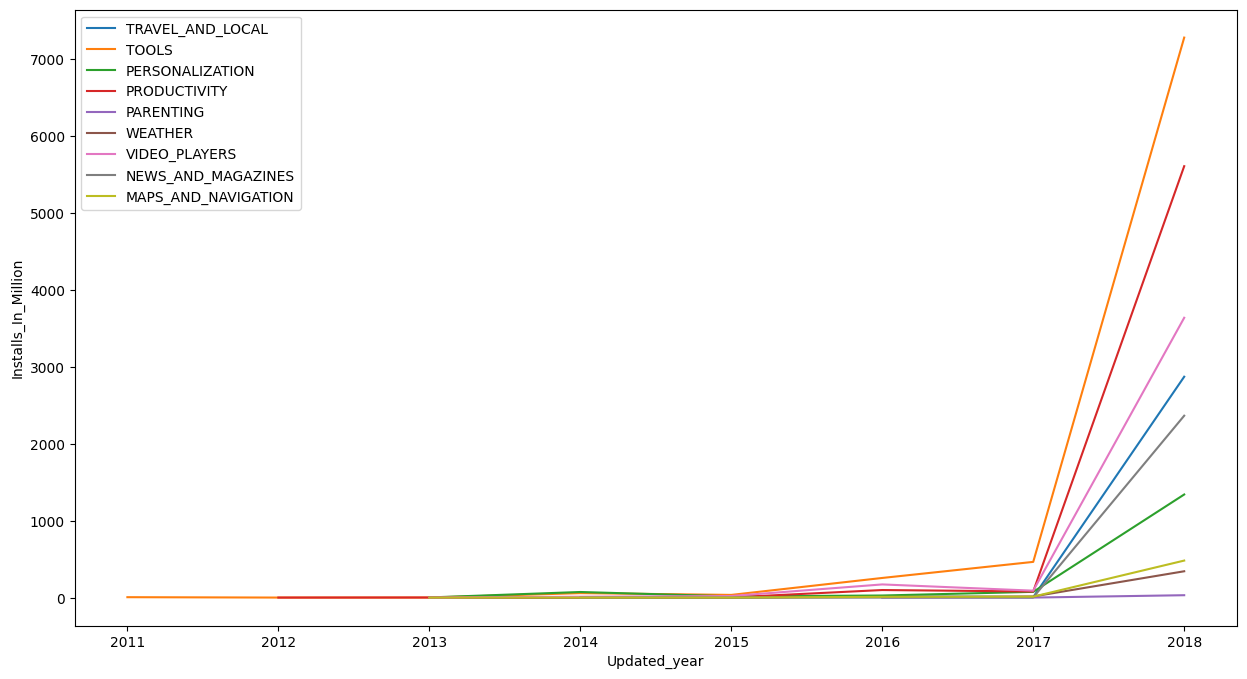

In [58]:
for i in [e1,e2,e3,e4]:
 plt.figure(figsize=(15,8))
 sns.lineplot(data=i,x='Updated_year',y='Installs_In_Million',hue='Category')
 plt.legend(loc=0)
 plt.show()

From the above graphs we can see that **App in Game , Health and fitness , Productivity , Tools , Entertainment and communication** Category have **sharp increase** in **installs from 2017** .

####Which **App** , **Category** , **Content_Rating** , **Genres** And **Type** has the most  **Installs**?

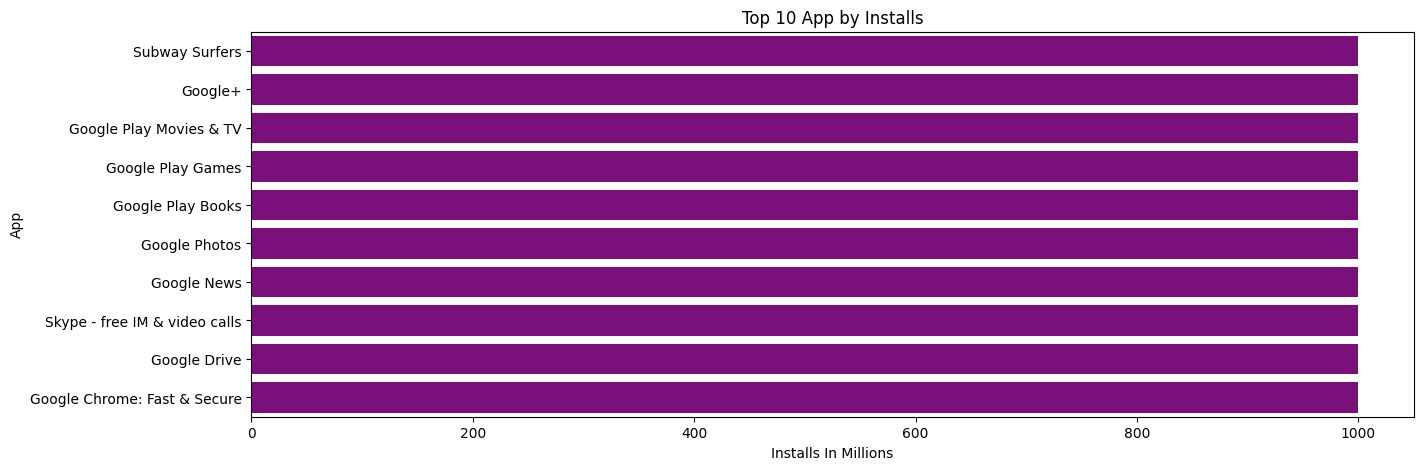

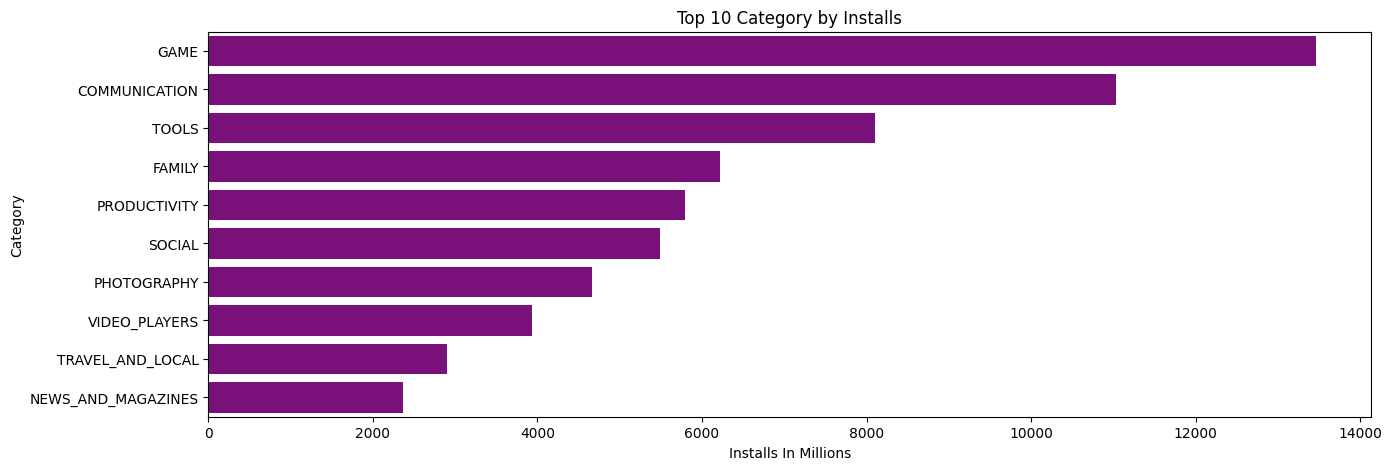

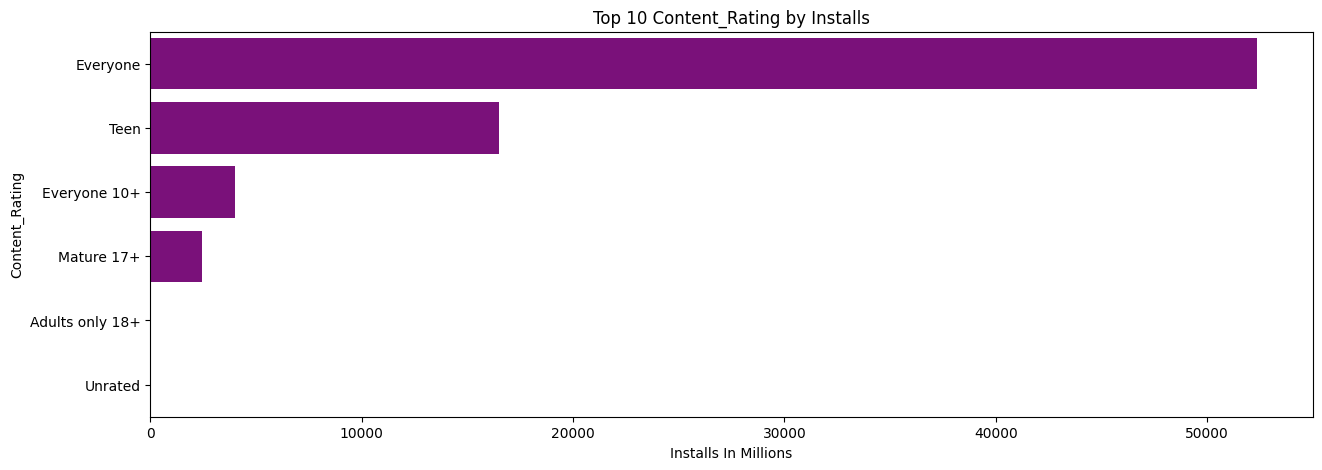

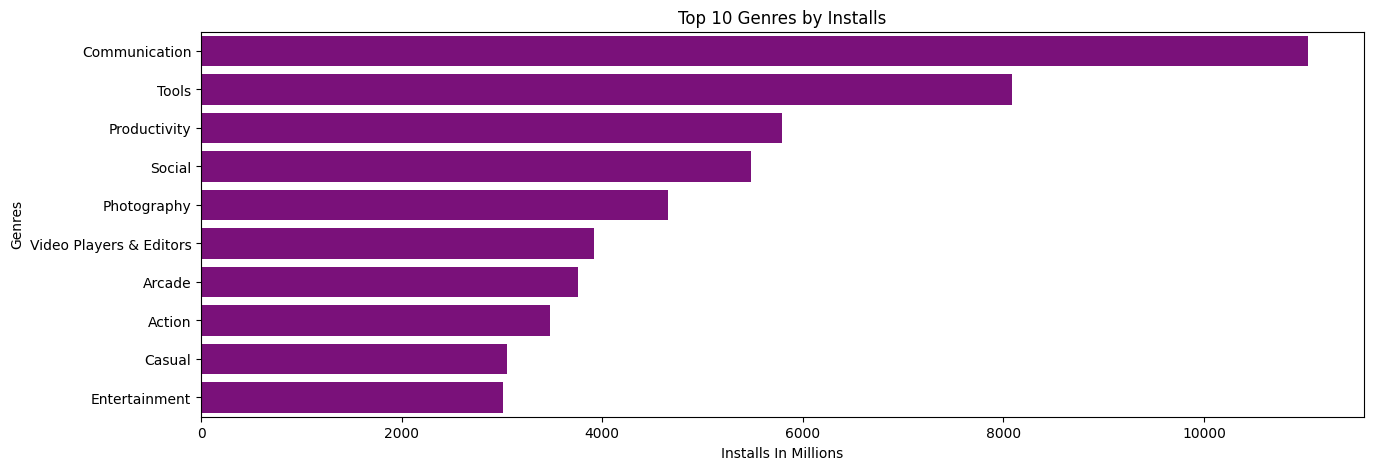

In [59]:
for i in ['App','Category','Content_Rating','Genres']:
  appdf=df.groupby(i)[['Installs_In_Million']].sum().sort_values(by=['Installs_In_Million'],ascending=False).reset_index().head(10)
  plt.figure(figsize=(15,5))
  plt.title(f'Top 10 {i} by Installs')
  sns.barplot(appdf,y=i,x='Installs_In_Million',color='darkmagenta')
  plt.ylabel(f'{i}')
  plt.xlabel('Installs In Millions')
  plt.show()


*   From the above visualisation we can infer that apps with most number of installs are **Subway Surfers,Google +,google play movies, google photos.**
*   In category section **Gaming** , **Communication** and **Tools** have highest installs.
*   Content which is accessible to **everyone** has most number of installs.

####Which **App** ,**Type** has the highest  **Ratings**?

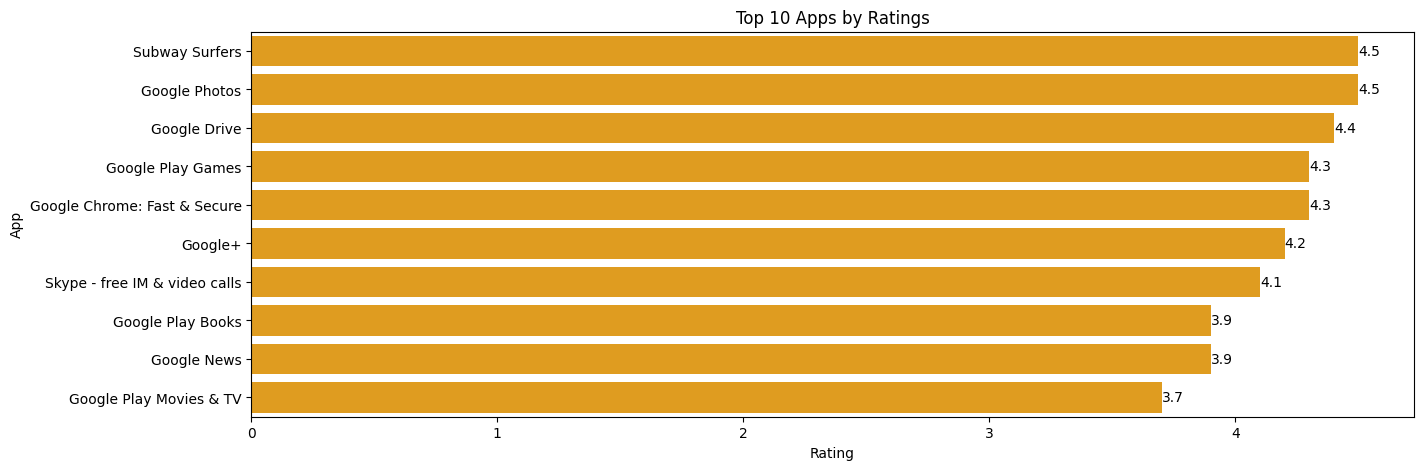

In [60]:
appdf=df.groupby('App')[['Rating','Installs_In_Million']].mean().sort_values(by=['Installs_In_Million'],ascending=False).reset_index().head(10)
appdf=round(appdf.sort_values(by=['Rating'],ascending=False),2)
plt.figure(figsize=(15,5))
plt.title(f'Top 10 Apps by Ratings')
ax=sns.barplot(appdf,y='App',x='Rating',color='orange')
ax.bar_label(ax.containers[0], fontsize=10);
plt.ylabel('App')
plt.xlabel('Rating')
plt.show()

In [61]:
df.groupby('Type')[['Installs_In_Million','Rating']].agg(['mean','median'])

Installs_In_Million           Rating       
                    mean median      mean median
Type                                            
Free            9.915389  0.500  4.166311    4.3
Paid            0.095499  0.005  4.262333    4.4

* So we can see that despite giving free services to the the customers the **free** category is **at par** with **paid category** in terms of **rating**.
* Paid categry has low number of installs

####Ralationship b/w **Installs** and **Price:**

<Axes: xlabel='Price', ylabel='Installs_In_Million'>

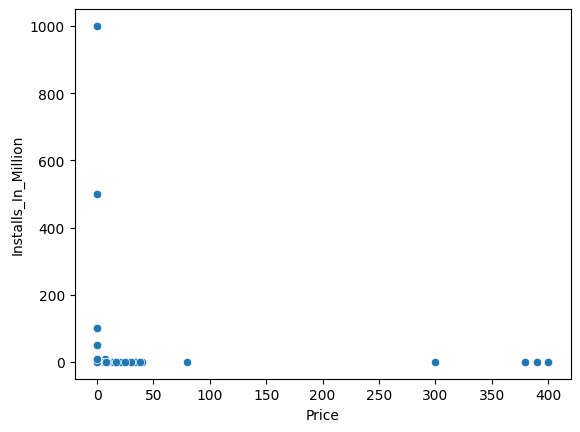

In [62]:
sns.scatterplot(data=df,x='Price',y='Installs_In_Million')

####Ralationship b/w **Installs** and **Reviews:**

<Axes: xlabel='Reviews', ylabel='Installs_In_Million'>

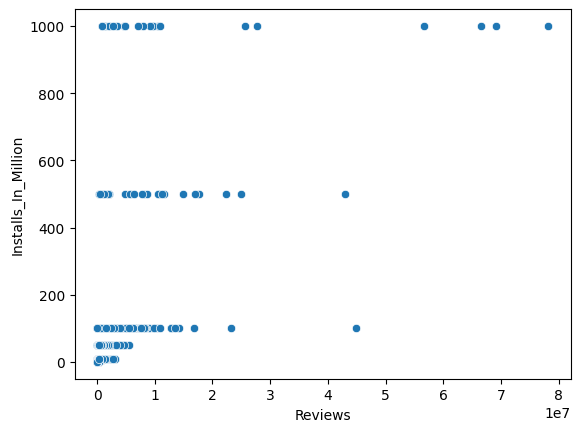

In [63]:
sns.scatterplot(data=df,x='Reviews',y='Installs_In_Million')

* Lower the price higher is number of installs.
* Higher installs have higher number of reviews

####**Which apps are the costliest?**

In [64]:
df.sort_values(by='Price',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs_In_Million,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Updated_year,Updated_month
3747,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,0.010,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,2018,May
4616,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,0.001,Paid,399.99,Everyone,Finance,2018-06-25,1.0.2,4.1 and up,2018,June
4601,I am Rich!,FINANCE,3.8,93,22M,0.001,Paid,399.99,Everyone,Finance,2017-12-11,1,4.1 and up,2017,December
4605,I Am Rich Pro,FAMILY,4.4,201,2.7M,0.005,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017,May
3742,💎 I'm rich,LIFESTYLE,3.8,718,26M,0.010,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018,March
4594,I am rich,LIFESTYLE,3.8,3547,1.8M,0.100,Paid,399.99,Everyone,Lifestyle,2018-01-12,2,4.0.3 and up,2018,January
4602,I am rich(premium),FINANCE,3.5,472,965k,0.005,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,2017,May
4597,I am Rich Plus,FAMILY,4.0,856,8.7M,0.010,Paid,399.99,Everyone,Entertainment,2018-05-19,3,4.4 and up,2018,May
4612,I am Rich,FINANCE,4.3,180,3.8M,0.005,Paid,399.99,Everyone,Finance,2018-03-22,1,4.2 and up,2018,March
4607,I am rich (Most expensive app),FINANCE,4.1,129,2.7M,0.001,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017,December


* Apps belonging to the **LIFESTYLE , FINANCE and FAMILY** have highest prices.

####**Which Category has the most installs in Paid and Free category?**

**Free Category:**

In [65]:
r=df[df['Type']=='Free'].groupby('Category')['Installs_In_Million'].sum().reset_index().sort_values(by='Installs_In_Million',ascending=False)
r['Installs_In_Million']/=(df[df['Type']=='Free']['Installs_In_Million'].sum()/100) # CAlculating % of installs in each category
r.rename(columns={'Installs_In_Million':'Installs %'},inplace=True)
r.head().round(1)

,Category,Installs %
14,GAME,17.9
6,COMMUNICATION,14.7
29,TOOLS,10.8
11,FAMILY,8.2
25,PRODUCTIVITY,7.7


**Paid Category:**

In [66]:
r=df[df['Type']=='Paid'].groupby('Category')['Installs_In_Million'].sum().reset_index().sort_values(by='Installs_In_Million',ascending=False,ignore_index=True)
r['Installs_In_Million']/=(df[df['Type']=='Paid']['Installs_In_Million'].sum()/100) # CAlculating % of installs in each category
r.rename(columns={'Installs_In_Million':'Installs %'},inplace=True)

r2=r.iloc[8:,:]  # storing 1st 8 categories on the basis of installs
other=','.join(list(r2['Category'].unique()))
l=list(r.iloc[8:,:].index)
r.drop(index=l,inplace=True)
r2

,Category,Installs %
8,LIFESTYLE,2.057806
9,WEATHER,1.416246
10,MEDICAL,0.972785
11,HEALTH_AND_FITNESS,0.825489
12,BUSINESS,0.371138
13,ENTERTAINMENT,0.349044
14,FINANCE,0.323913
15,TRAVEL_AND_LOCAL,0.317630
16,MAPS_AND_NAVIGATION,0.211346
17,EDUCATION,0.178012


In [67]:
othervalue=r2['Installs %'].sum() # storing value of installs of last 20 categories

In [68]:
d={'Category':'Other 20 categories','Installs %':othervalue} #cretaing a dic of last 20 categoires with their installs %

In [69]:
r=r._append(d,ignore_index=True)

In [70]:
r

,Category,Installs %
0,FAMILY,36.818600
1,GAME,36.648322
2,PERSONALIZATION,5.685087
3,PHOTOGRAPHY,3.278430
4,TOOLS,3.013680
5,PRODUCTIVITY,2.462173
6,COMMUNICATION,2.373499
7,SPORTS,2.170704
8,Other 20 categories,7.549506


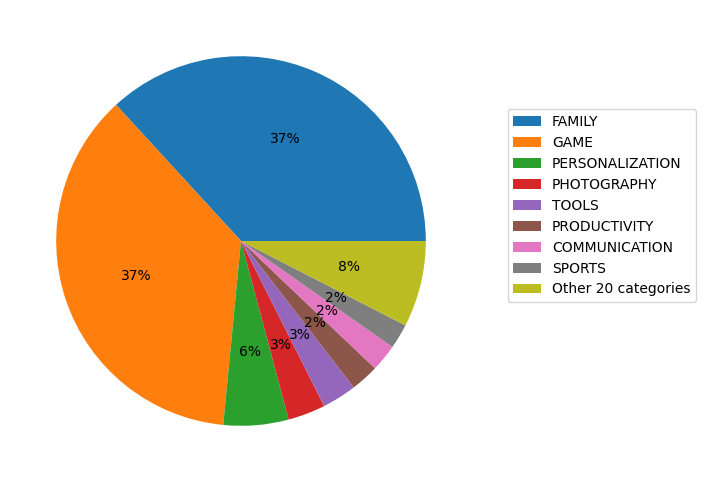

In [71]:
plt.figure(figsize=(6,6))
plt.pie(x=r['Installs %'],autopct='%1.0f%%')
plt.legend(r['Category'],loc=1,bbox_to_anchor=(1.5, .8))
plt.show()

Apps in **Game and Family category** have around **74%** installs in paid category

###**Multivariate Analysis:**

####**Which apps are best in each category?**

In [72]:
catdf=df.groupby('Category')['Installs_In_Million'].sum().reset_index().sort_values(by='Installs_In_Million',ascending=False).head().Category
list(catdf)
e=pd.DataFrame(columns=['App','Installs_In_Million','Rating','Category'])
for i in catdf:
  e1=df[df['Category']==i].groupby('App')[['Installs_In_Million','Rating']].mean().reset_index().sort_values(['Installs_In_Million','Rating'],ascending=[False,False]).head()
  e1['Category']=[i]*5
  u=pd.concat([e,e1],ignore_index=True)
  e=u.copy()

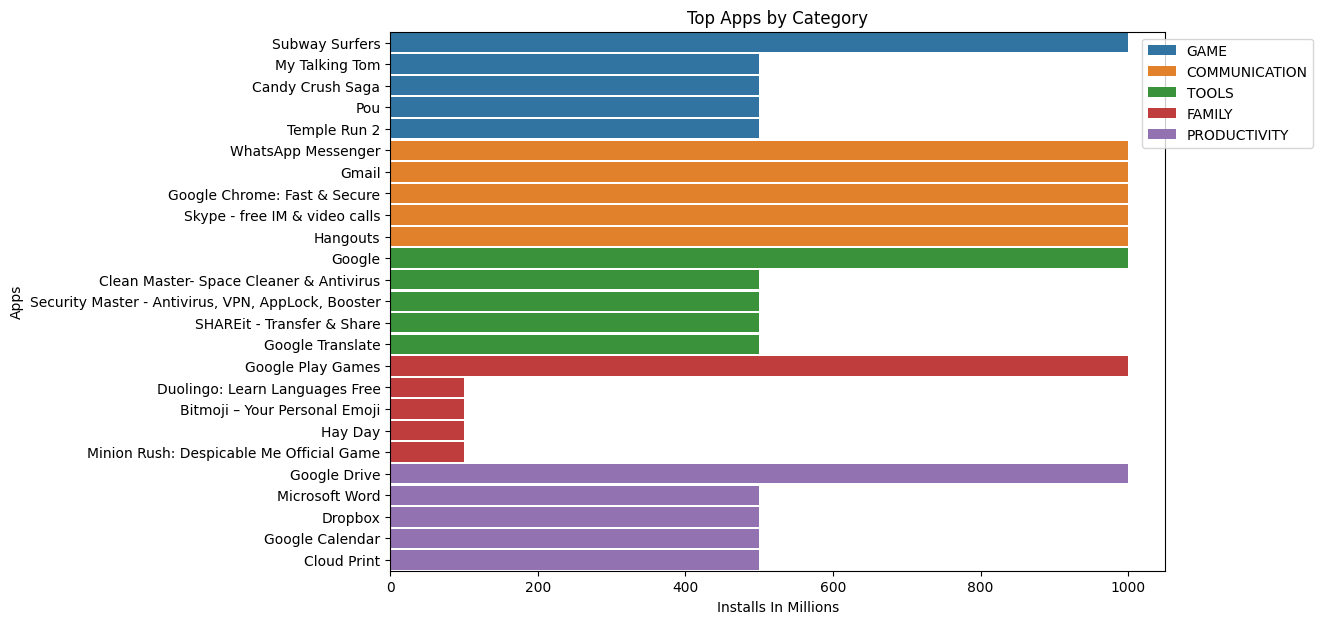

In [73]:
plt.figure(figsize=(10,7))
sns.barplot(data=u,x='Installs_In_Million',y='App',hue='Category',width=0.9)
plt.title('Top Apps by Category')
plt.xlabel('Installs In Millions')
plt.ylabel('Apps')
plt.legend(loc=1,bbox_to_anchor=(1.2, 1.))
plt.show()

####**Top apps in free and paid category**

In [74]:
freedf=df[df['Type']=='Free'].sort_values(by=['Installs_In_Million','Rating'],ascending=[False,False]).head(10)
paiddf=df[df['Type']=='Paid'].sort_values(by=['Installs_In_Million','Rating'],ascending=[False,False]).head(10)
z=pd.concat([freedf,paiddf],ignore_index=True)

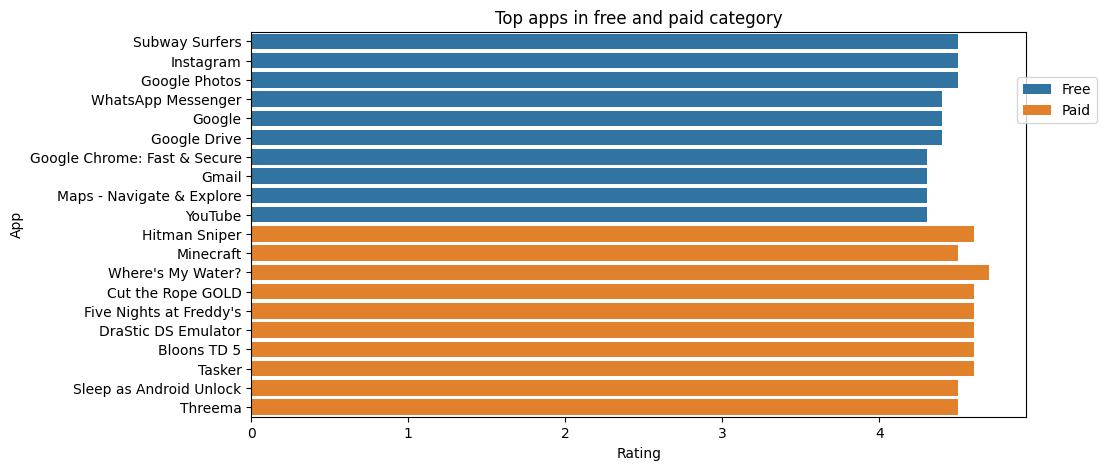

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(data=z,x='Rating',y='App',hue='Type',legend=True)
plt.title('Top apps in free and paid category')
plt.legend(loc=1,bbox_to_anchor=(1.1, .9))
plt.show()

In [76]:
df2=pd.read_csv('/content/User Reviews.csv')
df2.shape

(64295, 5)

In [77]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [78]:
df2.isna().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [80]:
for i in df2.columns:
  j=df2[i].unique()
  print(i,j,'',sep='\n\n')

App

['10 Best Foods for You' '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室' '11st' ...
 'Hotwire Hotel & Car Rental App' 'Housing-Real Estate & Property'
 'Houzz Interior Design Ideas']


Translated_Review

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis' nan ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']


Sentiment

['Positive' nan 'Neutral' 'Negative']


Sentiment_Polarity

[ 1.          0.25               nan ...  0.35916667 -0.52857143
 -0.37777778]


Sentiment_Subjectivity

[0.53333333 0.28846154        nan ... 0.51145833 0.7172619  0.2594697 ]




In [81]:
df2.dropna(thresh=4,inplace=True)

In [82]:
df2.isna().sum()

,0
App,0
Translated_Review,5
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


In [97]:
rdf=df2.groupby(['App'])['Sentiment'].value_counts().reset_index().pivot_table(index='App',columns='Sentiment',values='count').reset_index()
rdf

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,10.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21.0,8.0,39.0
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,17.0
862,Hotstar,14.0,4.0,14.0
863,Hotwire Hotel & Car Rental App,6.0,11.0,16.0


In [84]:
rdf.isna().sum()

,0
Sentiment,
App,0
Negative,83
Neutral,124
Positive,12


In [98]:
rdf.dropna(thresh=2,inplace=True)# to remove rows where negative, positive and neutral all are null so thresh=2 will return rows with atleast 2 non-null entries
rdf

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,10.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21.0,8.0,39.0
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,17.0
862,Hotstar,14.0,4.0,14.0
863,Hotwire Hotel & Car Rental App,6.0,11.0,16.0


In [99]:
rdf.isna().sum()

,0
Sentiment,
App,0
Negative,83
Neutral,124
Positive,12


In [100]:
rdf.fillna({'Negative':0	,'Neutral':0,	'Positive':0},inplace=True)

In [101]:
rdf['Total Reviews']=rdf.apply(lambda x : x['Negative']+ x['Neutral'] + x['Positive'],axis=1)

rdf['Positive-negative_(diff)']=rdf.apply(lambda x : abs(x['Positive'] - x['Negative']) , axis=1) # to have difference of positive and negative reviews

rdf.sort_values(by='Total Reviews',ascending=True)

Sentiment,App,Negative,Neutral,Positive,Total Reviews,Positive-negative_(diff)
679,Fruit Block - Puzzle Legend,1.0,0.0,0.0,1.0,1.0
494,Draw In,1.0,0.0,0.0,1.0,1.0
493,Draw A Stickman,1.0,0.0,0.0,1.0,1.0
467,Discover Mobile,1.0,0.0,0.0,1.0,1.0
775,HD Camera,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
510,Duolingo: Learn Languages Free,34.0,6.0,200.0,240.0,166.0
328,Calorie Counter - MyFitnessPal,52.0,34.0,169.0,255.0,117.0
817,Helix Jump,58.0,6.0,209.0,273.0,151.0
114,Angry Birds Classic,147.0,2.0,124.0,273.0,23.0


####**Which Apps have majority Positive reviews?**

In [102]:
prdf=rdf[rdf['Positive']>rdf['Negative']].sort_values(by='Total Reviews',ascending=False)
prdf.shape

(780, 6)

In [104]:
prdf.sort_values(by=['Positive-negative_(diff)','Total Reviews'],ascending=[False,True]).head(10)


Sentiment,App,Negative,Neutral,Positive,Total Reviews,Positive-negative_(diff)
510,Duolingo: Learn Languages Free,34.0,6.0,200.0,240.0,166.0
327,Calorie Counter - Macros,20.0,6.0,174.0,200.0,154.0
0,10 Best Foods for You,10.0,22.0,162.0,194.0,152.0
817,Helix Jump,58.0,6.0,209.0,273.0,151.0
24,8fit Workouts & Meal Planner,19.0,15.0,137.0,171.0,118.0
328,Calorie Counter - MyFitnessPal,52.0,34.0,169.0,255.0,117.0
329,Calorie Counter - MyNetDiary,4.0,15.0,120.0,139.0,116.0
378,ColorNote Notepad Notes,7.0,3.0,121.0,131.0,114.0
754,Google Photos,47.0,1.0,143.0,191.0,96.0
325,Calorie Counter & Diet Tracker,17.0,9.0,109.0,135.0,92.0


Above are top 10 apps with majority Positive reviews

####**Which Apps have majority Negative reviews?**

In [105]:
rdf[rdf['Positive']<rdf['Negative']].sort_values(by='Total Reviews',ascending=False).shape

(65, 6)

In [107]:
rdf[rdf['Positive']<rdf['Negative']].sort_values(by=['Positive-negative_(diff)','Total Reviews'],ascending=[False,False]).head(10)

Sentiment,App,Negative,Neutral,Positive,Total Reviews,Positive-negative_(diff)
335,Candy Crush Soda Saga,96.0,8.0,62.0,166.0,34.0
209,Be A Legend: Soccer,59.0,6.0,33.0,98.0,26.0
334,Candy Crush Saga,126.0,12.0,102.0,240.0,24.0
395,Cooking Fever,79.0,1.0,55.0,135.0,24.0
114,Angry Birds Classic,147.0,2.0,124.0,273.0,23.0
333,Candy Crush Jelly Saga,44.0,8.0,21.0,73.0,23.0
32,ABC News - US & World News,29.0,23.0,18.0,70.0,11.0
449,Delta Dental,20.0,11.0,9.0,40.0,11.0
774,HBO GO: Stream with TV Package,17.0,2.0,6.0,25.0,11.0
190,Bancomer móvil,21.0,8.0,11.0,40.0,10.0
